Results:
* for a fixed gain, fitted to the in vivo data, increasing the amplitude of the external noise degrades sorting accuracy.
* In the ideal condition when the signal is not corrupted by external noise, amplifying the signal only very does not improve sorting accuracy but can drastically degrade it, with Kilosort 3 and the default parameters.
* Panel with Buccino sorting accuracy per gain between fitted gain (same max amplitude as in vivo and in silico) up to fitted gain g*6 showed that sorting accuracy does not change with increasing gain, within this range.

In [12]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
import spikeinterface as si 
from spikeinterface import comparison

# DATASETS

# SILICO MARQUES
data_conf_marques, _ = get_config("silico_neuropixels", "concatenated").values()
SORTING_TRUE = data_conf_marques["sorting"]["simulation"]["ground_truth"]["output"]
SFREQ = 40000

# KS3 SORTINGS
SORTING_NO_NOISE = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV"]
SORTING_P99 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"][
    "output_buttw_gain_fitd_noise_99_perc_lower"
]
SORTING_P95 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"][
    "output_buttw_gain_fitd_noise_95_perc_lower"
]
SORTING_P90 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"][
    "output_buttw_gain_fitd_noise_90_perc_lower"
]
SORTING_P75 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"][
    "output_buttw_gain_fitd_noise_75_perc_lower"
]
SORTING_P50 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"][
    "output_buttw_gain_fitd_noise_50_perc_lower"
]
SORTING_FIT = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_fitd"]
SORTING_G1E5 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_1e5"]
SORTING_G1E6 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_1e6"]



# FIGURE SETTINGS
FIG_SIZE = (4, 4)
COLOR_VIVO = np.array([153,153,153]) / 255
COLOR_SILI = np.array([228, 26, 28]) / 255
COLOR_BUCCI = np.array([55,126,184]) / 255
BOX_ASPECT = 1                  # square fig
LG_FRAMEON = False              # no legend frame
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30
plt.rcParams['lines.linewidth'] = 1.1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.width'] = 0.8 * 1.2
plt.rcParams['xtick.major.size'] = 3.5 * 1.2
plt.rcParams['xtick.minor.size'] = 2 * 1.2
plt.rcParams['ytick.major.size'] = 3.5 * 1.2
plt.rcParams['ytick.major.width'] = 0.8 * 1.2
plt.rcParams['ytick.minor.size'] = 2 * 1.2

N_MAJOR_TICKS = 4
N_MINOR_TICKS = 12
YLIM = [1e-7, 1e8]
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-29 15:39:33,838 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-29 15:39:33,894 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Utils

In [6]:
def get_accuracy_for_slice(
    GT_SORTING_PATH_marques, KS_SORTING_PATH_marques, start_frame, end_frame
):
    SortingTrue = si.load_extractor(GT_SORTING_PATH_marques)
    SortingTrue = SortingTrue.frame_slice(start_frame=start_frame, end_frame=end_frame)

    SortingKS = si.load_extractor(KS_SORTING_PATH_marques)
    comp = comparison.compare_sorter_to_ground_truth(
        SortingTrue, SortingKS, exhaustive_gt=True
    )
    return comp.agreement_scores.max(axis=1).sort_values(ascending=False).values

In [7]:
# list available sortings
data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]

{'output_buttw_noise_0uV': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/SortingKS3_buttw_noise_0uV_10m/',
 'ks3_output_buttw_noise_0uV': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/KS3_output_buttw_noise_0uV_10m/',
 'output_buttw_noise_20_perc_lower': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/SortingKS3_buttw_noise_20_perc_lower_10m/',
 'ks3_output_buttw_noise_20_perc_lower': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/KS3_output_buttw_noise_20_perc_lower_10m/',
 'output_buttw_noise_fitd': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/SortingKS3_noise_fitd_10m/',
 'ks3_output_buttw_noise_fitd': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_20

### Accuracies

In [13]:
# crashes!
# a_no_noise = np.mean(
#     get_accuracy_for_slice(
#         SORTING_TRUE,
#         SORTING_NO_NOISE,
#         start_frame=0,
#         end_frame=10 * 60 * SFREQ,
#     )
#     >= 0.8
# )

a_no_noise_g1e6 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_G1E6,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

a_no_noise_g1e5 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_G1E5,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

a_99 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_P99,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

a_95 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_P95,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

a_90 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_P90,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

# 75% less noise (i.e., 25% * noise)
a_75 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_P75,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

a_50 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_P50,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

a_fit = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_FIT,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spik

### Plot

[0.024495677233429394, 0.09293948126801153, 0.0893371757925072, 0.07780979827089338, 0.0893371757925072, 0.07564841498559077, 0.06556195965417867, 0.048270893371757925]


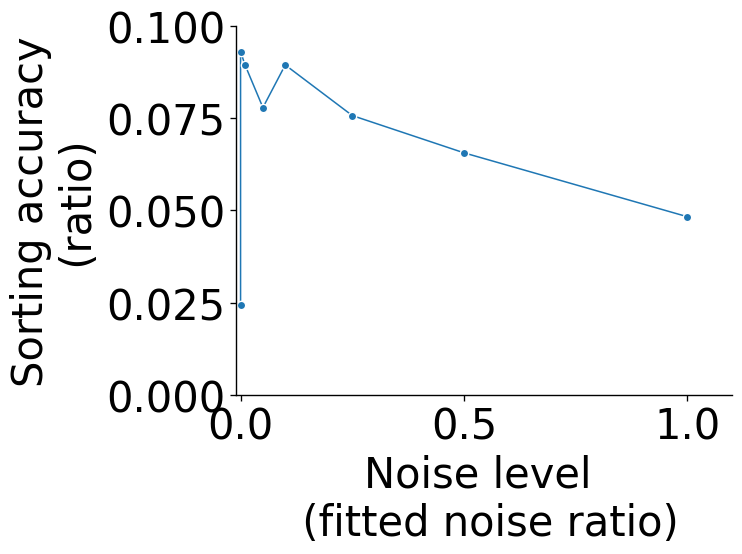

In [14]:
# set plot data
accs = [
    a_no_noise_g1e6,  # much higher gain
    a_no_noise_g1e5,  # much higher gain
    a_99,  # fitted gain
    a_95,  # fitted gain
    a_90,  # fitted gain
    a_75,  # fitted gain
    a_50,  # fitted gain
    a_fit,  # fitted gain
]
noises = [0, 0, 0.01, 0.05, 0.1, 0.25, 0.5, 1]

# plot
fig, ax = plt.subplots()
ax.plot(noises, accs, "-o", markeredgecolor="w")
ax.set_ylabel("Sorting accuracy\n (ratio)")
ax.set_xlabel("Noise level \n (fitted noise ratio)")
ax.set_ylim([0, 0.1])
ax.set_xlim([-0.01, 1.1])

# save
# plt.savefig("figures/6_supp/supp_fig2/svg/npx_acc_vs_noise.svg", **savefig_cfg)

print(accs)

### Checking noise 

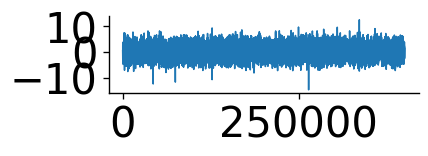

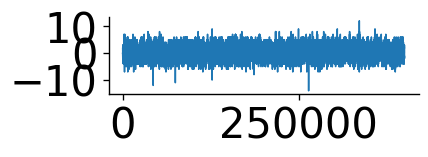

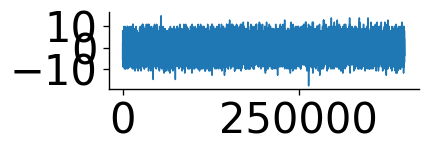

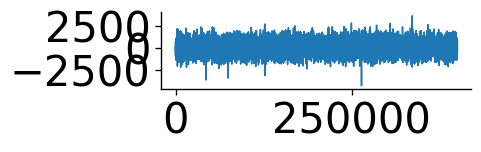

In [3]:
# noise
fig, ax = plt.subplots(figsize=(4, 1))
Rec = si.load_extractor(
    data_conf_marques["probe_wiring"]["10m"]["output_noise_0uV_int16"]
)
trace0 = Rec.get_traces(channel_ids=[256])
ax.plot(trace0[: 10 * 40000])


fig, ax = plt.subplots(figsize=(4, 1))
Rec = si.load_extractor(
    data_conf_marques["probe_wiring"]["10m"][
        "output_gain_fitd_noise_99_perc_lower_int16"
    ]
)
trace0 = Rec.get_traces(channel_ids=[256])
ax.plot(trace0[: 10 * 40000])


fig, ax = plt.subplots(figsize=(4, 1))
Rec = si.load_extractor(
    data_conf_marques["probe_wiring"]["10m"]["output_noise_fitd_int16"]
)
trace0 = Rec.get_traces(channel_ids=[256])
plt.plot(trace0[: 10 * 40000])

# gains
fig, ax = plt.subplots(figsize=(4, 1))
Rec = si.load_extractor(
    data_conf_marques["probe_wiring"]["10m"]["output_noise_0uV_gain_1e5_int16"]
)
trace0 = Rec.get_traces(channel_ids=[256])
plt.plot(trace0[: 10 * 40000])